### Marine Acoustics Workbook

In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

# Figures appear in notebook inline
%matplotlib inline


In [2]:
def slice_data(data, window_size, step_size):
    """Slice 1D array into windows with a given step size"""
    nrows = ((data.size-window_size)//step_size)+1
    ncol = window_size
    old_stride = data.strides[0]

    # Add .copy() for a writable array
    sliced_view = np.lib.stride_tricks.as_strided(data, shape=(nrows,ncol), strides=(step_size*old_stride,old_stride), writeable=False)
    
    return sliced_view


def plot_waveform(signal_data, sample_freq, title='Audio Waveform', xlabel='Time (s)', ylabel='Amplitude'):
    """Plot the signal waveform"""
    
    # Calculate time in seconds
    time = np.linspace(0, len(signal_data) / sample_freq, num=len(signal_data))

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(time, signal_data)


def plot_spectrogram(signal_data, sample_freq, title='Spectrogram', xlabel='Time (s)', ylabel='Frequency (Hz)'):
    """Plot the signal spectrogram"""

    # Plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.specgram(signal_data, Fs=sample_freq)



### Read .wav audio

In [3]:
# File path to .wav file
audio_file_path = "../data/humpback.wav"

# Read entire mono .wav file using default sampling rate
y, sr = librosa.load(audio_file_path, sr=None, mono=True, offset=0.0, duration=None)



### Plot the audio waveform

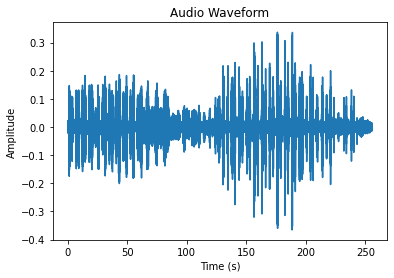

In [4]:
plot_waveform(y, sr)


### Plot the spectrogram

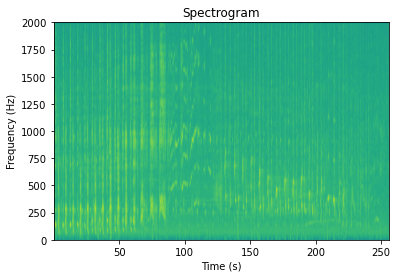

In [5]:
plot_spectrogram(y, sr)


### Slice signal into windows

In [6]:
# Set window size and step size
WINDOW_SIZE = 1*sr
STEP_SIZE = 1*sr

# Create view of sliced signal
sliced_view = slice_data(y, WINDOW_SIZE, STEP_SIZE)
print(sliced_view)


[[-6.1035156e-05  2.7465820e-04 -1.8310547e-03 ... -5.7830811e-02
  -5.2124023e-02  4.0588379e-03]
 [ 4.0802002e-02  3.2745361e-02  1.0803223e-02 ... -5.7067871e-03
  -2.8381348e-03  1.1871338e-02]
 [ 6.2255859e-03 -1.2817383e-03 -8.2702637e-03 ... -2.4261475e-02
  -1.6723633e-02 -1.3549805e-02]
 ...
 [ 7.0190430e-04  2.5024414e-03 -3.3874512e-03 ...  3.0517578e-03
   4.6691895e-03  1.5258789e-04]
 [-2.1362305e-03 -5.2490234e-03 -8.6975098e-03 ...  3.1738281e-03
   4.6081543e-03  5.3100586e-03]
 [ 3.3569336e-03  3.3569336e-03  9.4604492e-04 ...  4.5471191e-03
   1.9836426e-03 -1.2512207e-03]]
